In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler
# sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
%matplotlib inline

# numbers
import numpy as np
import pandas as pd

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re
from pprint import pprint

In [2]:
X_train_Normal = pd.read_excel('Normal 00 train (480x52).xlsx')
X_train_Fault=pd.read_excel('Fault 1-20  train (20x480x52).xlsx')

In [3]:
X_test_Fault = pd.read_excel('Fault 1-20  test  (20x960x52).xlsx')
X_test_Normal = pd.read_excel('Normal 00 test (960x52).xlsx')

In [6]:
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
X_train_Fault = pd.read_excel('Fault 1-20  train (20x480x52).xlsx', header=None , names = Names)

In [7]:
Label_train_Faulty=X_train_Fault.iloc[:,1]
Label_train_Normal=X_train_Normal.iloc[:,1]
Label_test_Faulty=X_test_Fault.iloc[:,1]
Label_test_Normal=X_test_Normal.iloc[:,1]

In [8]:
X_train_Fault_main=X_train_Fault.iloc[:,4:]
X_train_Normal_main=X_train_Normal.iloc[:,4:]
X_test_Fault_main=X_test_Fault.iloc[:,4:]
X_test_Normal_main=X_test_Normal.iloc[:,4:]

In [9]:
Data_train_concat = pd.concat([X_train_Fault_main, X_train_Normal_main]).values
Data_test_concat = pd.concat([X_test_Fault_main, X_test_Normal_main] ).values
Label_train = pd.concat([Label_train_Faulty, Label_train_Normal]).values
Label_test = pd.concat([Label_test_Faulty, Label_test_Normal]).values

In [10]:
scaler = MinMaxScaler()
Data_train = scaler.fit_transform(Data_train_concat)
Data_test = scaler.fit_transform(Data_test_concat)

In [11]:
scaler = StandardScaler()
Data_train = scaler.fit_transform(Data_train_concat)
Data_test = scaler.fit_transform(Data_test_concat)

covariance

In [ ]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(Data_train_concat)

In [12]:
X_cov = np.cov(Data_train.T)

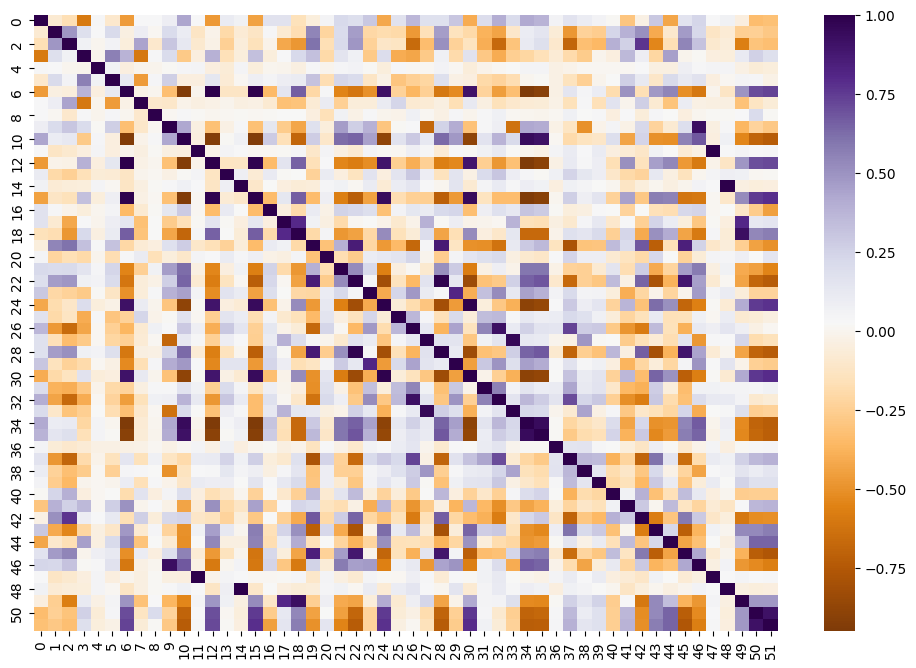

In [13]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_cov), annot=False, cmap='PuOr')
plt.show()

In [14]:
eigenvals, eigenvecs = np.linalg.eig(X_cov)

In [15]:
print(eigenvals.shape)

(52,)


In [16]:
unsrt_eigenvalvec = [(np.abs(eigenvals[i]), eigenvecs[:,i]) for i in range(len(eigenvals))]

In [17]:
eigenvalvec = sorted(unsrt_eigenvalvec, reverse=True, key=lambda x:x[0])
print(eigenvals.shape)

(52,)


In [18]:
srt_eig=sorted(eigenvals)

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame([pair[1] for pair in eigenvalvec[0:52]]),
            annot=False, cmap='coolwarm',
           vmin=-0.5,vmax=0.5)

plt.ylabel("Ranked Eigenvalue")
plt.xlabel("Eigenvector Components")
plt.show()

In [19]:
#lam_sum = sum(eigenvals)
explained_variance = [(lam_k) for lam_k in sorted(eigenvals, reverse=True)]

In [20]:
srt_eigg=sorted(eigenvals, reverse=True)

In [ ]:
print(srt_eigg)

In [21]:
lam_sum = sum(eigenvals)
explained_variance = [(srt_eigg) for lam_k in sorted(eigenvals, reverse=True)]

In [ ]:
print(explained_variance)

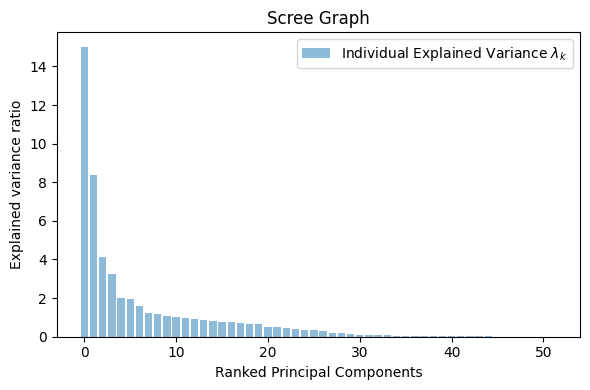

In [22]:
plt.figure(figsize=(6, 4))

plt.bar(range(len(srt_eigg)), srt_eigg, alpha=0.5, align='center',
        label='Individual Explained Variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

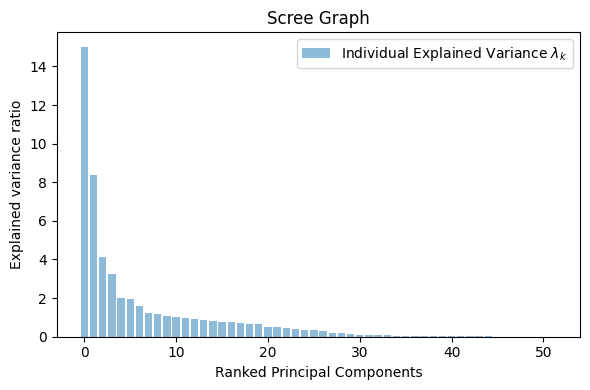

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='Individual Explained Variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

In [34]:
pca = PCA(n_components=2)

In [35]:
X_train= pca.fit_transform(Data_train)
X_test = pca.transform(Data_test)

In [ ]:
X_mean = np.mean(X_train, axis=0)
X_cov = (X_train - X_mean).T.dot((X_train - X_mean)) / (X_train.shape[0]-1)

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_cov), annot=False, cmap='PuOr')
plt.show()

In [ ]:
ax = fig.add_subplot(projection='3d')
plt.scatter(Data_train[:,1], Data_train[:,2], c=Label_train)
plt.show()

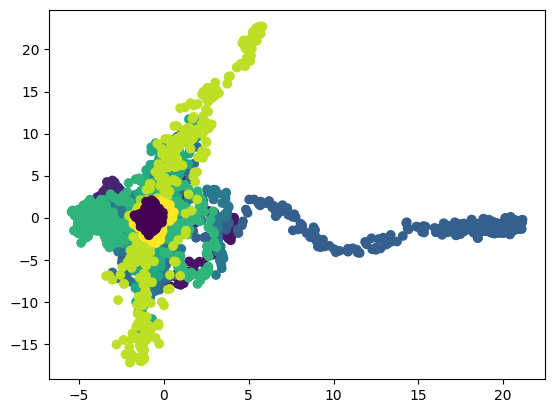

In [36]:
ax = fig.add_subplot(projection='3d')
plot = plt.scatter(X_train[:,0], X_train[:,1], c=Label_train)
#plt.legend(handles=plot.legend_elements()[0], labels=list(Label_train))
plt.show()

In [25]:
from sklearn import tree

In [26]:
classifier_DTC = tree.DecisionTreeClassifier(criterion='gini', max_depth=20)

In [27]:
classifier_DTC_1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=20)

In [28]:
classifier_DTC.fit(Data_train,Label_train)

DecisionTreeClassifier(max_depth=20)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
label_prediction=classifier_DTC.predict(Data_test)
report=classification_report(Label_test,label_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.07      0.02      0.04       960
           1       0.93      0.81      0.86       960
           2       0.99      0.81      0.89       960
           3       0.00      0.00      0.00       960
           4       0.89      0.60      0.72       960
           5       0.72      0.40      0.51       960
           6       0.94      0.82      0.87       960
           7       0.95      0.41      0.57       960
           8       0.24      0.28      0.26       960
           9       0.10      0.84      0.18       960
          10       0.57      0.27      0.36       960
          11       0.49      0.32      0.39       960
          12       0.32      0.52      0.40       960
          13       0.74      0.30      0.43       960
          14       0.91      0.65      0.76       960
          15       0.00      0.00      0.00       960
          16       0.27      0.25      0.26       960
          17       0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
classifier_DTC_1.fit(X_train,Label_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay

In [33]:
label_prediction=classifier_DTC.predict(Data_test)
report=classification_report(Label_test,label_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.07      0.02      0.04       960
           1       0.93      0.81      0.86       960
           2       0.99      0.81      0.89       960
           3       0.00      0.00      0.00       960
           4       0.89      0.60      0.72       960
           5       0.72      0.40      0.51       960
           6       0.94      0.82      0.87       960
           7       0.95      0.41      0.57       960
           8       0.24      0.28      0.26       960
           9       0.10      0.84      0.18       960
          10       0.57      0.27      0.36       960
          11       0.49      0.32      0.39       960
          12       0.32      0.52      0.40       960
          13       0.74      0.30      0.43       960
          14       0.91      0.65      0.76       960
          15       0.00      0.00      0.00       960
          16       0.27      0.25      0.26       960
          17       0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1200x1000 with 0 Axes>

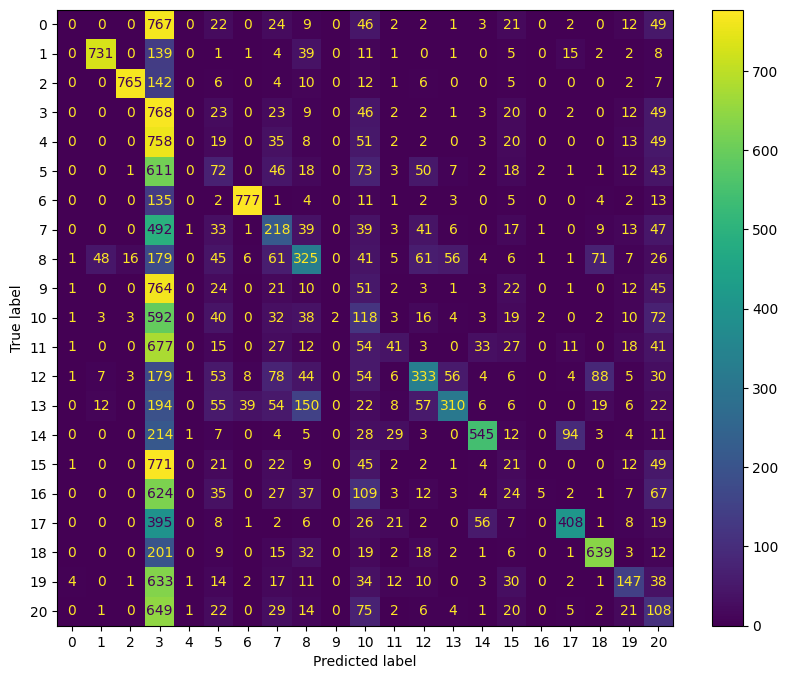

In [ ]:
conf_matrix=confusion_matrix(Label_test,label_prediction)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=classifier_DTC.classes_)
plt.figure(figsize=(12.0 , 10.0))
plt.rcParams['figure.figsize']=(10,8)

disp.plot()